# Supervised Learning and K Nearest Neighbors Exercises


Based on a chosen distance metric, the KNN algorithm finds the k samples in the
training dataset that are closest (most similar) to the point that we want to classify.
The class label of the new data point is then determined by a majority vote among its
k nearest neighbors.

1. Choose the number of k and a distance metric.
2. Find the k-nearest neighbors of the sample that we want to classify.
3. Assign the class label by majority vote.


### Task 1

We will be predicting whether a consumer will discontinue their telecom service subscription or not. Required:
* Import Dataset in csv file named 'Orange_Telecom_Churn_Data' from folder data.
* Display list of columns and their datatypes. Differentiate between Categorical and Numerical Data
* Attribute identifier can be dropped or set as and index. Before that, check whether the attribute is unique or not. This can be done by examining the count of every value in the attribite. *Hint*: phone_number is a type of identifier

In [4]:
import pandas as pd
import numpy as np
data = pd.read_csv('Data/Orange_Telecom_Churn_Data.csv')

In [5]:
data.columns

Index(['state', 'account_length', 'area_code', 'phone_number', 'intl_plan',
       'voice_mail_plan', 'number_vmail_messages', 'total_day_minutes',
       'total_day_calls', 'total_day_charge', 'total_eve_minutes',
       'total_eve_calls', 'total_eve_charge', 'total_night_minutes',
       'total_night_calls', 'total_night_charge', 'total_intl_minutes',
       'total_intl_calls', 'total_intl_charge',
       'number_customer_service_calls', 'churned'],
      dtype='object')

In [9]:
data.dtypes

state                             object
account_length                     int64
area_code                          int64
phone_number                      object
intl_plan                         object
voice_mail_plan                   object
number_vmail_messages              int64
total_day_minutes                float64
total_day_calls                    int64
total_day_charge                 float64
total_eve_minutes                float64
total_eve_calls                    int64
total_eve_charge                 float64
total_night_minutes              float64
total_night_calls                  int64
total_night_charge               float64
total_intl_minutes               float64
total_intl_calls                   int64
total_intl_charge                float64
number_customer_service_calls      int64
churned                             bool
dtype: object

In [11]:
numerical_columns = data.select_dtypes(include=['int64', 'float64']).columns
categorical_columns = data.select_dtypes(include=['object']).columns

print(f"Numerical columns: {numerical_columns}")
print(f"Categorical columns: {categorical_columns}")

Numerical columns: Index(['account_length', 'area_code', 'number_vmail_messages',
       'total_day_minutes', 'total_day_calls', 'total_day_charge',
       'total_eve_minutes', 'total_eve_calls', 'total_eve_charge',
       'total_night_minutes', 'total_night_calls', 'total_night_charge',
       'total_intl_minutes', 'total_intl_calls', 'total_intl_charge',
       'number_customer_service_calls'],
      dtype='object')
Categorical columns: Index(['state', 'phone_number', 'intl_plan', 'voice_mail_plan'], dtype='object')


In [17]:
#drop or set as an index
print(data['phone_number'].nunique() == len(data))

True


In [19]:
X=data.drop('phone_number', axis=1)
y=data.churned

### Task 2
* Notice that some of the columns are categorical data and some are floats. These features will need to be numerically encoded.
* Split data into Predictor and Target
* Split data into Train and Test with 7:3 ratio.
* Finally, K-nearest neighbors requires scaled data.


In [26]:
from sklearn.preprocessing import LabelEncoder
#Encode the data from categorical to numerical data
categorical_columns = data.select_dtypes(include=['object']).columns  # Ensure you get correct columns

label_encoders = {}
for col in categorical_columns:
    le = LabelEncoder()
    data[col] = le.fit_transform(data[col].astype(str)) 
    label_encoders[col] = le  

In [28]:
#Get predictor
#Get target
X = data.drop(columns=['churned'])
y = data['churned']

In [30]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

In [32]:
#Scale the data.
from sklearn.preprocessing import StandardScaler

# Initialize the scaler
scaler = StandardScaler()

# Fit and transform the training data, and transform the test data
X_scale_train = scaler.fit_transform(X_train)
X_scale_test = scaler.transform(X_test)

### Task 3
* Import K-Nearest Neigbor Classifier from from `sklearn.neighbors`. Let's assume the `k`-value as 2.
* Train the classifier using Training Data
* Perform prediction with trained classifier using Predictor in Testing Data

In [35]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=2)

In [37]:
knn = knn.fit(X_scale_train,y_train)

In [39]:
y_pred = knn.predict(X_scale_test)
y_pred 

array([ True, False, False, ..., False, False,  True])

### Task 4

* Evaluate the performance of classifier by measuring the accuracy. Accuracy can be determined by comparing predicted and actual tested data.
* Print the classification report to get more details on performance

In [43]:
from sklearn.metrics import classification_report
#calculates the accuracy of a machine learning model by comparing the predicted values 
#(stored in y_pred) with the actual values (stored in y_test).
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.876

In [45]:
from sklearn.metrics import classification_report
report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

       False       0.88      0.99      0.93      1293
        True       0.68      0.19      0.30       207

    accuracy                           0.88      1500
   macro avg       0.78      0.59      0.61      1500
weighted avg       0.86      0.88      0.84      1500



### Task 5

* Fit a K-nearest neighbors model using values of `k` (`n_neighbors`) ranging from 1 to 20. Use uniform weights (the default). 
* Plot (or view the table of) the `accuracy` vs `k` to decide on most optimal `k`

In [48]:
#Fit a K-nearest neighbors model using values of k (n_neighbors) ranging from 1 to 20
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

k_values = list(range(1, 21))
accuracies = []

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)

    knn.fit(X_scale_train, y_train)

    y_pred = knn.predict(X_scale_test)

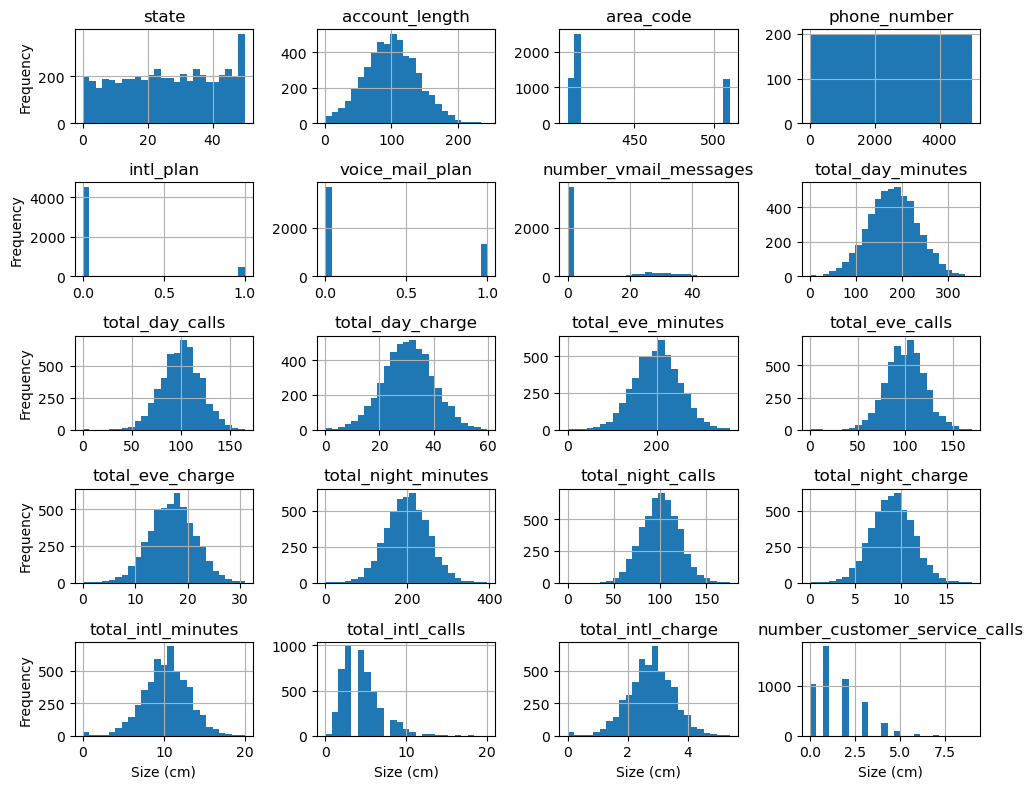

In [50]:
#See most optimal k-val from graph
import matplotlib.pyplot as plt

# Create histograms with Pandas
axList = data.hist(bins=25, figsize=(10, 8))

# Add labels to the first column and the last row of plots
for ax in axList.flatten():
    # Check if the current plot is in the last row
    if ax.get_subplotspec().is_last_row():
        ax.set_xlabel('Size (cm)')
    
    # Check if the current plot is in the first column
    if ax.get_subplotspec().is_first_col():
        ax.set_ylabel('Frequency')

# Display the plots
plt.tight_layout()
plt.show()